Huebler, Elliot: 90/100
1.) Matrix multiplication not done right
2.) No figure caption in exercise 3

In [1]:
import numpy as np
matrix1= np.array([[1,2,3,4],[4,3,2,1],[0,0,0,0],[3,10,4,4]])
matrix2= np.array([[3,17,3,8],[4,0,1,1],[0,0,2,2],[4,111,9,499]])
print matrix1
print matrix2

manip = matrix1*8
print manip
manip2 = matrix1+matrix2
print manip2
manip3 = (matrix1-(matrix2)^3)*7
print manip3

#matrix multiplication is a dot product

[[ 1  2  3  4]
 [ 4  3  2  1]
 [ 0  0  0  0]
 [ 3 10  4  4]]
[[  3  17   3   8]
 [  4   0   1   1]
 [  0   0   2   2]
 [  4 111   9 499]]
[[ 8 16 24 32]
 [32 24 16  8]
 [ 0  0  0  0]
 [24 80 32 32]]
[[  4  19   6  12]
 [  8   3   3   2]
 [  0   0   2   2]
 [  7 121  13 503]]
[[  -21   -98    21    -7]
 [   21     0    14    21]
 [   21    21   -21   -21]
 [  -28  -728   -56 -3458]]


In [2]:
import math
pi = 3.141592653
def fn(x,y):
    f = 1.0
    for k in range(1, y):
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
    return f
x=pi/2
y=1
while fn(x,y+1) != fn(x,y):
    y = y+1
    
print y


15


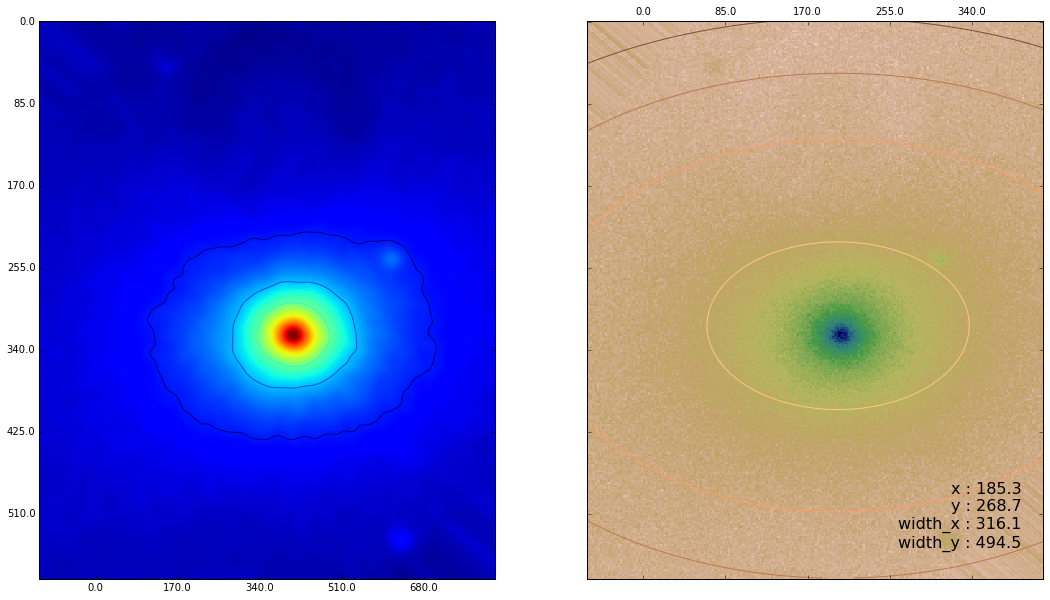

In [12]:
from astropy.io import fits
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import sys
sys.path.append('/u/home/christoq/Classes/Astro361/Fall2016/introduction/')
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import Image
import subprocess
from numpy import *
from scipy import optimize
from pylab import *
%matplotlib inline



def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = sqrt(abs((arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = sqrt(abs((arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: ravel(gaussian(*p)(*indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

from astropy.io import fits
from scipy import ndimage
import sys
data = fits.getdata('andromeda_rot.fits')
blurred_data = ndimage.gaussian_filter(data,sigma=3)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(18, 10))

ax2.matshow(data, cmap=cm.gist_earth_r)

params = fitgaussian(data)
fit = gaussian(*params)

contour(fit(*indices(data.shape)), cmap=cm.copper)
ax = gca()
(height, x, y, width_x, width_y) = params

text(0.95, 0.05, """
x : %.1f
y : %.1f
width_x : %.1f
width_y : %.1f""" %(x, y, width_x, width_y),
        fontsize=16, horizontalalignment='right',
        verticalalignment='bottom', transform=ax.transAxes)

#ax1.imshow()

ax1.contour(blurred_data)
ax1.imshow(blurred_data)

label1 = ax1.get_xticks().tolist()
label2 = ax1.get_yticks().tolist()
label1 = [1.7*x for x in label1]
label2 = [1.7*x for x in label2]

ax1.set_xticklabels(label1)
ax1.set_yticklabels(label1)
ax2.set_xticklabels(label2)
ax2.set_yticklabels(label2)

1. Introduce yourself to the Python language, the use of a notebook, and the use of GIT repositories.
2. Learn how to make and manipulate numerical data as vectors and n-dimensional matrices.
3. Learn how to make, manipulate, and annotate figures.
4. Learn how to read in and manipulate tabular data.
5. Learn how to define functions and to use simple loops in your programming.
6. Learn how to read in and manipulate astronomical image data.

1. This did a fairly okay job introducing me to ipython. It also made me realize I have a lot to learn. This object oriented language is great for astronomy, allowing numbers and photos to be manipulated. GIT repositories are helpful for astronomers working on a team because code is easily shared and updated.

2. Importing numpy and math allowed me to manipulate numbers, vectors, and matrices is very straight forward way in Python, this has many uses in astronomy such as calculating equations and countless other general calculations.

3. Although I haven't gotten the hang of it yet, manipulating figures is important for understanding/representing the data in an organized and useful way. This tutorial went over many different types of graphs and plots.

4. Using the loadtext method from this tutorial to read in data will be useful in astronomy because astronomers often have to deal with very large data sets.

5. Using 'while' and 'for' commands is very helpful to iterate through values of variables in order to find a fitting value for any given scenario.

6. Reading in and manipulating astronomical image data is in my opinion the most difficult subject covered in this tutorial. However I also see it as the most useful, ipython and .fits data go together quite well allowing astronomers to visualize, manipulate, and organize data. In this tutorial we read in a .fits file, blurred it for better visualization, plotted contour lines on it, and applied a gaussian filter.